In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Tarea 1
## Tablero de ajedrez

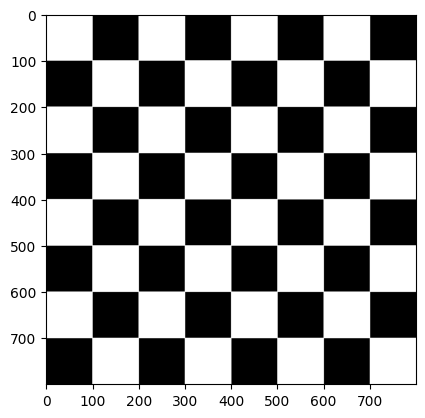

True

In [44]:
height = 800
width = 800
image = np.zeros((height,width), dtype = np.uint8)
divisions = 8
block_size = width // divisions
offset = False

for y in range(0, height, height // divisions):
    current_offset = int(offset) * block_size

    for x in range(0, width, width // (divisions // 2)):
        cv2.rectangle(image, (x + current_offset, y), (x + block_size + current_offset, y + block_size), (255, 255, 255), -1)
    
    offset = not offset

plt.imshow(image, cmap='gray') 
plt.show()

cv2.imwrite('imgs/chess.jpg', image)

# Tarea 2
## Imagen estilo mondrian

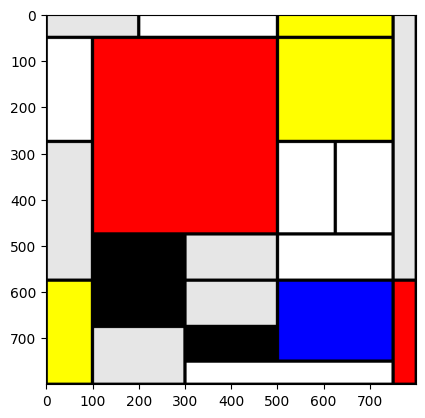

True

In [145]:
height = 800
width = 800

img = np.full((height, width, 3), 255, dtype=np.uint8)

red = (255,0,0)
blue = (0,0,255)
yellow = (255,255,0)
gray = (230, 230, 230)
white = (255, 255, 255)
black = (0, 0, 0)

rectangles = [
    [(0, 0), (200, 50), gray],
    [(200, 0), (500, 50), white],
    [(500, 0), (750, 50), yellow],
    [(750, 0), (800, 575), gray],
    [(0, 50), (100, 275), white],
    [(100, 50), (500, 475), red],
    [(500, 50), (750, 275), yellow],
    [(0, 275), (100, 575), gray],
    [(500, 275), (625, 475), white],
    [(625, 275), (750, 475), white],
    [(100, 475), (300, 675), black],
    [(0, 575), (100, height), yellow],
    [(300, 475), (500, 575), gray],
    [(500, 575), (750, 750), blue],
    [(750, 575), (height, width), red],
    [(300, 675), (500, 750), black],
    [(100, 675), (300, height), gray],
    [(300, 750), (750, height), white],
    [(300, 575), (500, 675), gray],
    [(500, 475), (750, 575), white],
]

for i, rectangle in enumerate(rectangles):
    cv2.rectangle(img, rectangle[0], rectangle[1], rectangle[2], -1)
    cv2.rectangle(img, rectangle[0], rectangle[1], (0, 0, 0), 5)

plt.imshow(img)
plt.show()

cv2.imwrite('imgs/mondrian.jpg', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

# Tarea 3
## Editar los valores de diferentes planos de una imagen
### Clase creada para la realización de esta tarea

In [ ]:
from enum import Enum

class Tarea3(Enum):
    NEGATIVE = 0
    INVERT_GREEN = 1
    INVERT_RED = 2
    INVERT_BLUE = 3

    @classmethod
    def apply_transformation(cls, image, transformation):
        methods_map = {
            cls.NEGATIVE: cls.negative_image,
            cls.INVERT_GREEN: cls.invert_green,
            cls.INVERT_RED: cls.invert_red,
            cls.INVERT_BLUE: cls.invert_blue
        }
        if transformation in methods_map:
            return methods_map[transformation](image)
        else:
            raise ValueError(f"Transformación {transformation} no válida")

    @staticmethod
    def negative_image(image):
        return 255 - image
    
    @staticmethod
    def invert_green(image):
        image = image.copy()
        image[:,:,1] = 255 - image[:,:,1]
        return image

    @staticmethod
    def invert_red(image):
        image = image.copy()
        image[:,:,2] = 255 - image[:,:,2]
        return image

    @staticmethod
    def invert_blue(image):
        image = image.copy()
        image[:,:,0] = 255 - image[:,:,0]
        return image
    
    @staticmethod
    def change_color_percentage(image, r=1, g=1, b=1):
        image = image.copy()
        image[:,:,0] = (image[:,:,0] * r) if r != -1 else 255 - image[:,:,0]
        image[:,:,1] = (image[:,:,1] * g) if g != -1 else 255 - image[:,:,1]
        image[:,:,2] = (image[:,:,2] * b)if b != -1 else 255 - image[:,:,2]
        return image

### Modificación de los distintos planos de un vídeo capturado en vivo con la webcam

In [ ]:
video = cv2.VideoCapture(0)
current_method = Tarea3.NEGATIVE

methods_map = {
    49: Tarea3.NEGATIVE,
    50: Tarea3.INVERT_GREEN,
    51: Tarea3.INVERT_BLUE,
    52: Tarea3.INVERT_RED
}

while True:
    ret, frame = video.read()

    if ret:
        transformed = Tarea3.apply_transformation(frame, current_method)
        cv2.imshow('RGB', transformed)
    
    pressed_key = cv2.waitKey(20) & 0xFF

    if pressed_key == 27:  # ESC
        break
    elif pressed_key in methods_map:
        current_method = methods_map[pressed_key]

video.release()
cv2.destroyAllWindows()

### Modificación de los diferentes planos de una imagen leída de disco
#### Imagen original

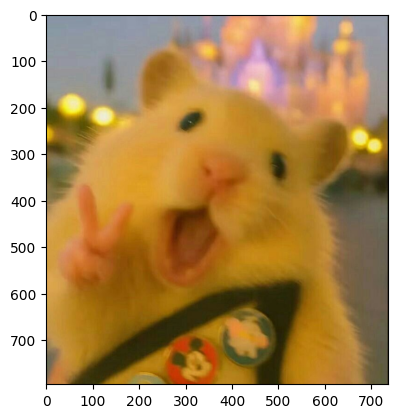

In [ ]:
image = cv2.imread('imgs/happy_hamster.jpg', cv2.IMREAD_COLOR_RGB)
plt.imshow(image)
plt.show()

#### Imagen en negativo

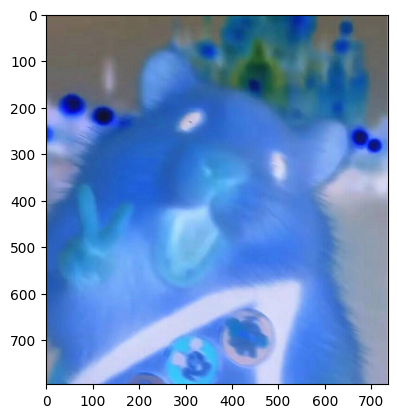

In [ ]:
plt.imshow(Tarea3.apply_transformation(image, Tarea3.NEGATIVE))
plt.show()

#### Imagen con verde en negativo

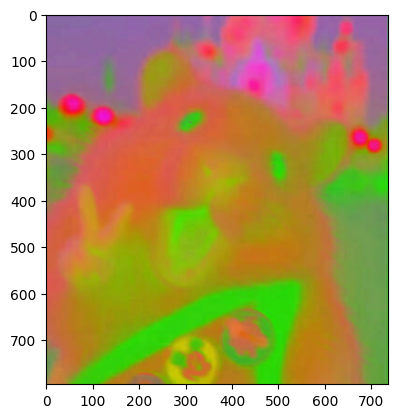

In [ ]:
plt.imshow(Tarea3.apply_transformation(image, Tarea3.INVERT_GREEN))
plt.show()

#### Imagen con rojo negativo, verde al 12% de su valor y azul eliminado

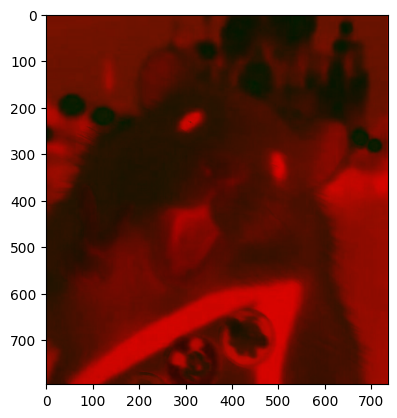

In [ ]:
plt.imshow(Tarea3.change_color_percentage(image, -1, 0.12, 0))
plt.show()

# Tarea 4.1
## Dibujar un círculo en píxel más oscuro y más claro

### Función para encontrar el valor mínimo de la imagen y devolver su posición

In [92]:
def darkest_pixel_index(image):
    y, x, *_ = np.unravel_index(np.argmin(image), image.shape)
    return (x, y)

### Función para encontrar el valor máximo de la imagen y devolver su posición

In [47]:
def lightest_pixel_index(image):
    y, x, *_ = np.unravel_index(np.argmax(image), image.shape)
    return (x, y)

### Función para ajustar el texto a dibujar dentro de la imagen

In [121]:
def put_text_inside(
    img,
    text,
    pos,
    font=cv2.FONT_HERSHEY_SIMPLEX,
    scale=0.6,
    color=(0,0,0),
    thickness=1,
    offset=(10, -10)
):
    h, w = img.shape[:2]
    (text_w, text_h), _ = cv2.getTextSize(text, font, scale, thickness)

    x = pos[0] + offset[0]
    y = pos[1] + offset[1]

    if x < 0:
        x = 0
    if x + text_w > w:
        x = w - text_w
    if y - text_h < 0:
        y = text_h
    if y > h - 1:
        y = h - 1

    cv2.putText(img, text, (x, y), font, scale, color, thickness, cv2.LINE_AA)

### Detección en vídeo tomado en tiempo real con la webcam

In [136]:
video = cv2.VideoCapture(0)

while True:
    ret, frame = video.read()

    if not ret:
        break

    min_index = darkest_pixel_index(frame)
    max_index = lightest_pixel_index(frame)

    val_max = frame[max_index[1], max_index[0]].copy()
    val_min = frame[min_index[1], min_index[0]].copy()

    cv2.circle(frame, min_index, 5, (255, 255, 255), -1)
    cv2.circle(frame, max_index, 5, (0, 0, 0), -1)
    cv2.line(frame, min_index, max_index, (0, 255, 150), 1)

    put_text_inside(frame, str(val_max), max_index, offset=(10, -10))
    put_text_inside(frame, str(val_min), min_index, offset=(10, -10))

    cv2.imshow("RGB", frame)
    if cv2.waitKey(20) == 27:
        break

video.release()
cv2.destroyAllWindows()

### Detección en imagen cargada desde disco

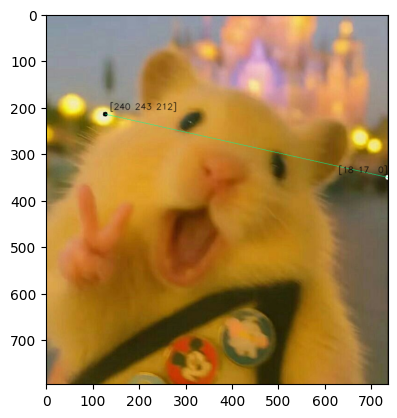

In [119]:
image = cv2.imread("imgs/happy_hamster.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

min_index = darkest_pixel_index(gray)
max_index = lightest_pixel_index(gray)

val_max = image[max_index[1], max_index[0]].copy()
val_min = image[min_index[1], min_index[0]].copy()

cv2.circle(image, min_index, 5, (255, 255, 255), -1)
cv2.circle(image, max_index, 5, (0, 0, 0), -1)
cv2.line(image, min_index, max_index, (0, 255, 150))

put_text_inside(image, str(val_max), max_index)
put_text_inside(image, str(val_min), min_index)

plt.imshow(image)
plt.show()


# Tarea 4.2
## Dibujar el 8x8 más oscuro / claro

### Fuerza bruta

In [ ]:
video = cv2.VideoCapture(0)

while True:
    ret, frame = video.read()
    if not ret:
        break

    h, w, c = frame.shape

    current_max = float('-inf')
    current_min = float('inf')
    max_coords = None
    min_coords = None

    for y in range(0, h - 8, 8):
        for x in range(0, w - 8, 8):
            block = frame[y:y+8, x:x+8]
            value = np.mean(block)

            if value > current_max:
                current_max = value
                max_coords = (x, y)

            if value < current_min:
                current_min = value
                min_coords = (x, y)

    if min_coords:
        cv2.rectangle(frame, min_coords, (min_coords[0]+8, min_coords[1]+8), (0,255,0), 2)
    if max_coords:
        cv2.rectangle(frame, max_coords, (max_coords[0]+8, max_coords[1]+8), (0,0,255), 2)

    cv2.imshow('RGB', frame)

    if cv2.waitKey(20) == 27:
        break

video.release()
cv2.destroyAllWindows()


### Usando una máscara

In [135]:
video = cv2.VideoCapture(0)
block_size = 32

while True:
    ret, frame = video.read()

    if not ret:
        break

    h, w, c = frame.shape
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray_crop = gray[:(h//block_size)*block_size-block_size,:(w//block_size)*block_size-block_size]

    kernel = np.ones((block_size, block_size), dtype=np.float32) / (block_size**2)

    avg_map = cv2.filter2D(gray_crop, -1, kernel)

    min_idx = np.unravel_index(np.argmin(avg_map), avg_map.shape)
    max_idx = np.unravel_index(np.argmax(avg_map), avg_map.shape)

    cv2.rectangle(frame, (min_idx[1], min_idx[0]), (min_idx[1]+block_size, min_idx[0]+block_size), (0,255,0), 1)
    cv2.rectangle(frame, (max_idx[1], max_idx[0]), (max_idx[1]+block_size, max_idx[0]+block_size), (0,0,255), 1)

    cv2.imshow("RGB", frame)

    if cv2.waitKey(20) == 27:
        break

video.release()
cv2.destroyAllWindows()
